In [16]:
import numpy as np
import pandas as pd     # For data-preprocessing
from sklearn import datasets    # For loading iris datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [2]:
# Load iris datasets
iris = datasets.load_iris()

# Transform iris.data to be DataFrame
iris.data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Decode categorical data as numeric to its real categories
iris.target=pd.Categorical.from_codes(iris.target, iris.target_names)

# Transform iris.target to be DataFrame
iris.target = pd.DataFrame({'species' : iris.target})
iris.target

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [4]:
# Split dataset to be train set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [5]:
# Show the shape of train set and test set
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (105, 4)
y_train shape: (105, 1)
X_test shape: (45, 4)
y_test shape: (45, 1)


In [6]:
# Apply Cross Validation using GridSearch Method
n = np.arange(1,51,1)
parameters = { 'n_neighbors': n }

# Do grid-search cross validation with 10 folds
cv = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=-1, cv=10, verbose=10)
cv.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=10)

In [13]:
# Show the best parameter of neighbors value
k = cv.best_params_
print(k)

# show the model accuracy from using best number of neighbor value
print(cv.best_score_)

{'n_neighbors': 6}
0.9609090909090909


In [10]:
## Classify using Knn classifier from sklearn
# Call knn classifier from sklearn using best #neighbour from grid-search cross validation
knn_sklearn = KNeighborsClassifier(n_neighbors=k['n_neighbors'])

In [11]:
# Train classifier
knn_sklearn.fit(X_train, y_train)

# Classify test set after classifier has been trained
y_pred = knn_sklearn.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


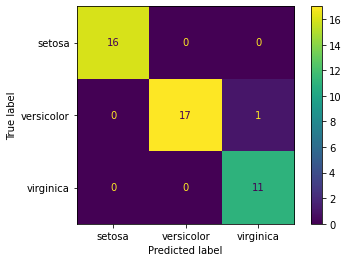

In [17]:
# Show confusion matrix of KNN classifier from sklearn
print(confusion_matrix(y_pred, y_test))

# Generating visualized confusion matrix
plot_confusion_matrix(knn_sklearn, X_test, y_test)